In [94]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load dataset
diabetes = fetch_openml('diabetes', version=1, parser='auto')

# Convert to DataFrame
full_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
full_data['target'] = diabetes.target

# Display results
print(full_data.head())
print(full_data.shape)


   preg  plas  pres  skin  insu      mass     pedi  age           target
0     6   148    72    35     0 33.600000 0.627000   50  tested_positive
1     1    85    66    29     0 26.600000 0.351000   31  tested_negative
2     8   183    64     0     0 23.300000 0.672000   32  tested_positive
3     1    89    66    23    94 28.100000 0.167000   21  tested_negative
4     0   137    40    35   168 43.100000 2.288000   33  tested_positive
(768, 9)


In [95]:
print(full_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   target  768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None


In [96]:

print(full_data.describe())


            preg       plas       pres       skin       insu       mass  \
count 768.000000 768.000000 768.000000 768.000000 768.000000 768.000000   
mean    3.845052 120.894531  69.105469  20.536458  79.799479  31.992578   
std     3.369578  31.972618  19.355807  15.952218 115.244002   7.884160   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     1.000000  99.000000  62.000000   0.000000   0.000000  27.300000   
50%     3.000000 117.000000  72.000000  23.000000  30.500000  32.000000   
75%     6.000000 140.250000  80.000000  32.000000 127.250000  36.600000   
max    17.000000 199.000000 122.000000  99.000000 846.000000  67.100000   

            pedi        age  
count 768.000000 768.000000  
mean    0.471876  33.240885  
std     0.331329  11.760232  
min     0.078000  21.000000  
25%     0.243750  24.000000  
50%     0.372500  29.000000  
75%     0.626250  41.000000  
max     2.420000  81.000000  


In [97]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
plas,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
pres,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
skin,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
insu,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
mass,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
pedi,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000


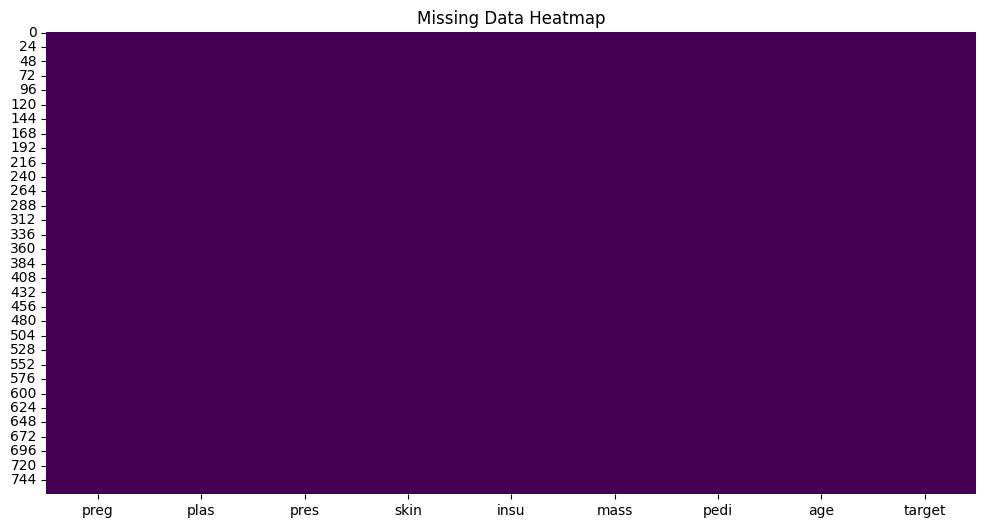

preg      0
plas      0
pres      0
skin      0
insu      0
mass      0
pedi      0
age       0
target    0
dtype: int64


In [98]:
plt.figure(figsize=(12, 6))
sns.heatmap(full_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()
print(full_data.isnull().sum())


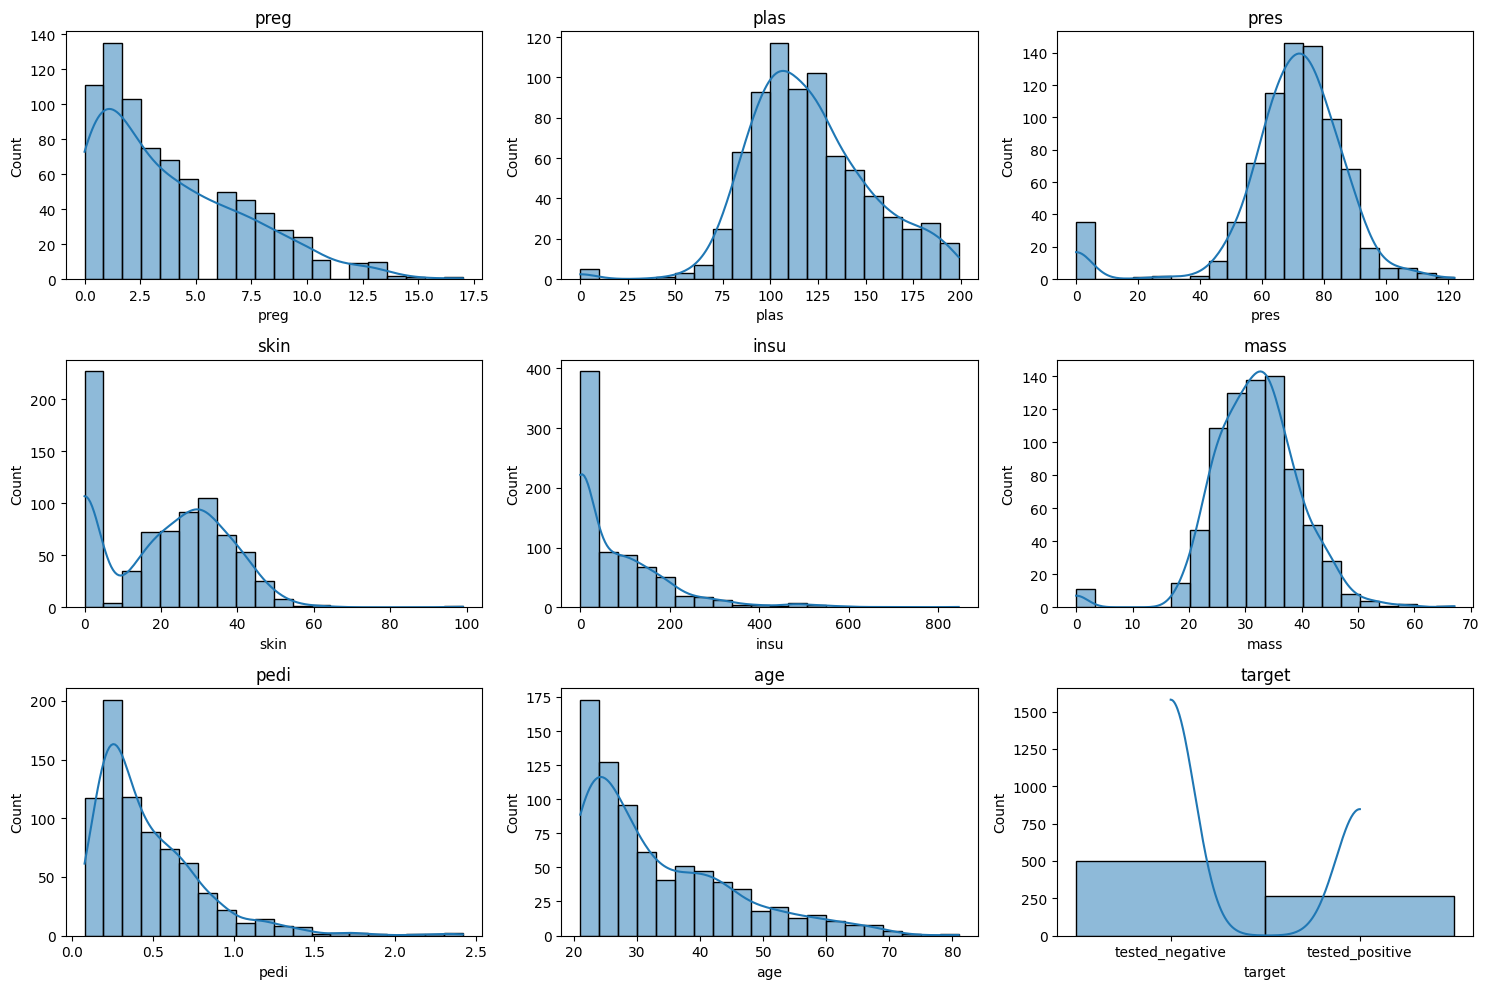

In [99]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(full_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(full_data[column], kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

In [100]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
full_data[features] = scaler.fit_transform(full_data[features])


In [101]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.000000,-0.000000,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
plas,768.000000,-0.000000,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
pres,768.000000,0.000000,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
skin,768.000000,0.000000,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
insu,768.000000,-0.000000,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
mass,768.000000,0.000000,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
pedi,768.000000,0.000000,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
age,768.000000,0.000000,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


In [102]:

X = full_data.drop('target', axis=1)
y = full_data['target']

# Display confirmation
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(full_data.head())

Features shape: (768, 8)
Target shape: (768,)
       preg      plas      pres      skin      insu      mass      pedi  \
0  0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1 -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2  1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3 -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4 -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   

        age           target  
0  1.425995  tested_positive  
1 -0.190672  tested_negative  
2 -0.105584  tested_positive  
3 -1.041549  tested_negative  
4 -0.020496  tested_positive  


3- Since This dataset doesnt have features of Rock. I am splitting the data as train val, and test here.
----

In [103]:
# Split data into train (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Print the shapes to confirm
print("Feature shapes:")
print("Train:", X_train.shape, " | Validation:", X_val.shape, " | Test:", X_test.shape)
print("\nTarget shapes:")
print("Train:", y_train.shape, " | Validation:", y_val.shape, " | Test:", y_test.shape)
print(full_data.columns)
full_data['target'].unique(), full_data['target'].dtype



Feature shapes:
Train: (614, 8)  | Validation: (77, 8)  | Test: (77, 8)

Target shapes:
Train: (614,)  | Validation: (77,)  | Test: (77,)
Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age',
       'target'],
      dtype='object')


(['tested_positive', 'tested_negative']
 Categories (2, object): ['tested_negative', 'tested_positive'],
 CategoricalDtype(categories=['tested_negative', 'tested_positive'], ordered=False, categories_dtype=object))

ANSWER 1:
---

768 entries are present. 8 fetures are there along with 1 target feature. It is a diabeties data set. every feature
is continuous. Target is categorical. We will change the target from a text format to a boolean
---
plas, pres, mass are roughly bell shaped.
Require Special Treatment for: a) preg, skin, insu, age and pedi distribution is skewed. Log-transform can be used to stabilize variance. Target can be converted to 0 and 1.
--

In [104]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Encode the target (tested_negative = 0, tested_positive = 1)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

# Combine X_train and encoded target for correlation
train_data = X_train.copy()
train_data['target_encoded'] = y_train_encoded

# Compute Pearson correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Display nicely rounded correlations
pd.set_option('display.float_format', lambda x: f'{x:,.6f}')
print(corr_matrix.round(6))


                    preg     plas     pres      skin      insu     mass  \
preg            1.000000 0.142507 0.157544 -0.070691 -0.066401 0.027197   
plas            0.142507 1.000000 0.158320  0.017320  0.337064 0.205162   
pres            0.157544 0.158320 1.000000  0.178062  0.085834 0.250012   
skin           -0.070691 0.017320 0.178062  1.000000  0.437564 0.386223   
insu           -0.066401 0.337064 0.085834  0.437564  1.000000 0.196035   
mass            0.027197 0.205162 0.250012  0.386223  0.196035 1.000000   
pedi           -0.018944 0.141597 0.044826  0.174623  0.158923 0.131945   
age             0.553048 0.270740 0.239588 -0.149863 -0.043823 0.004453   
target_encoded  0.207550 0.456117 0.082046  0.057912  0.108498 0.306335   

                    pedi       age  target_encoded  
preg           -0.018944  0.553048        0.207550  
plas            0.141597  0.270740        0.456117  
pres            0.044826  0.239588        0.082046  
skin            0.174623 -0.149863   

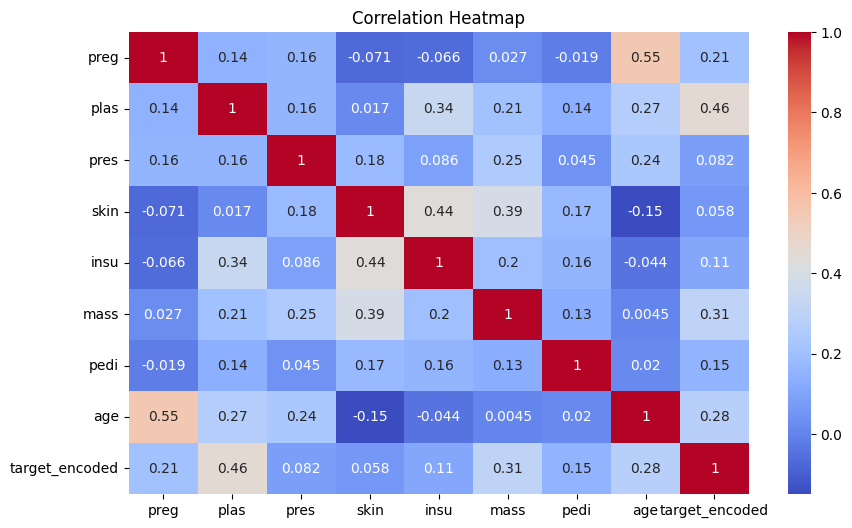

In [105]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

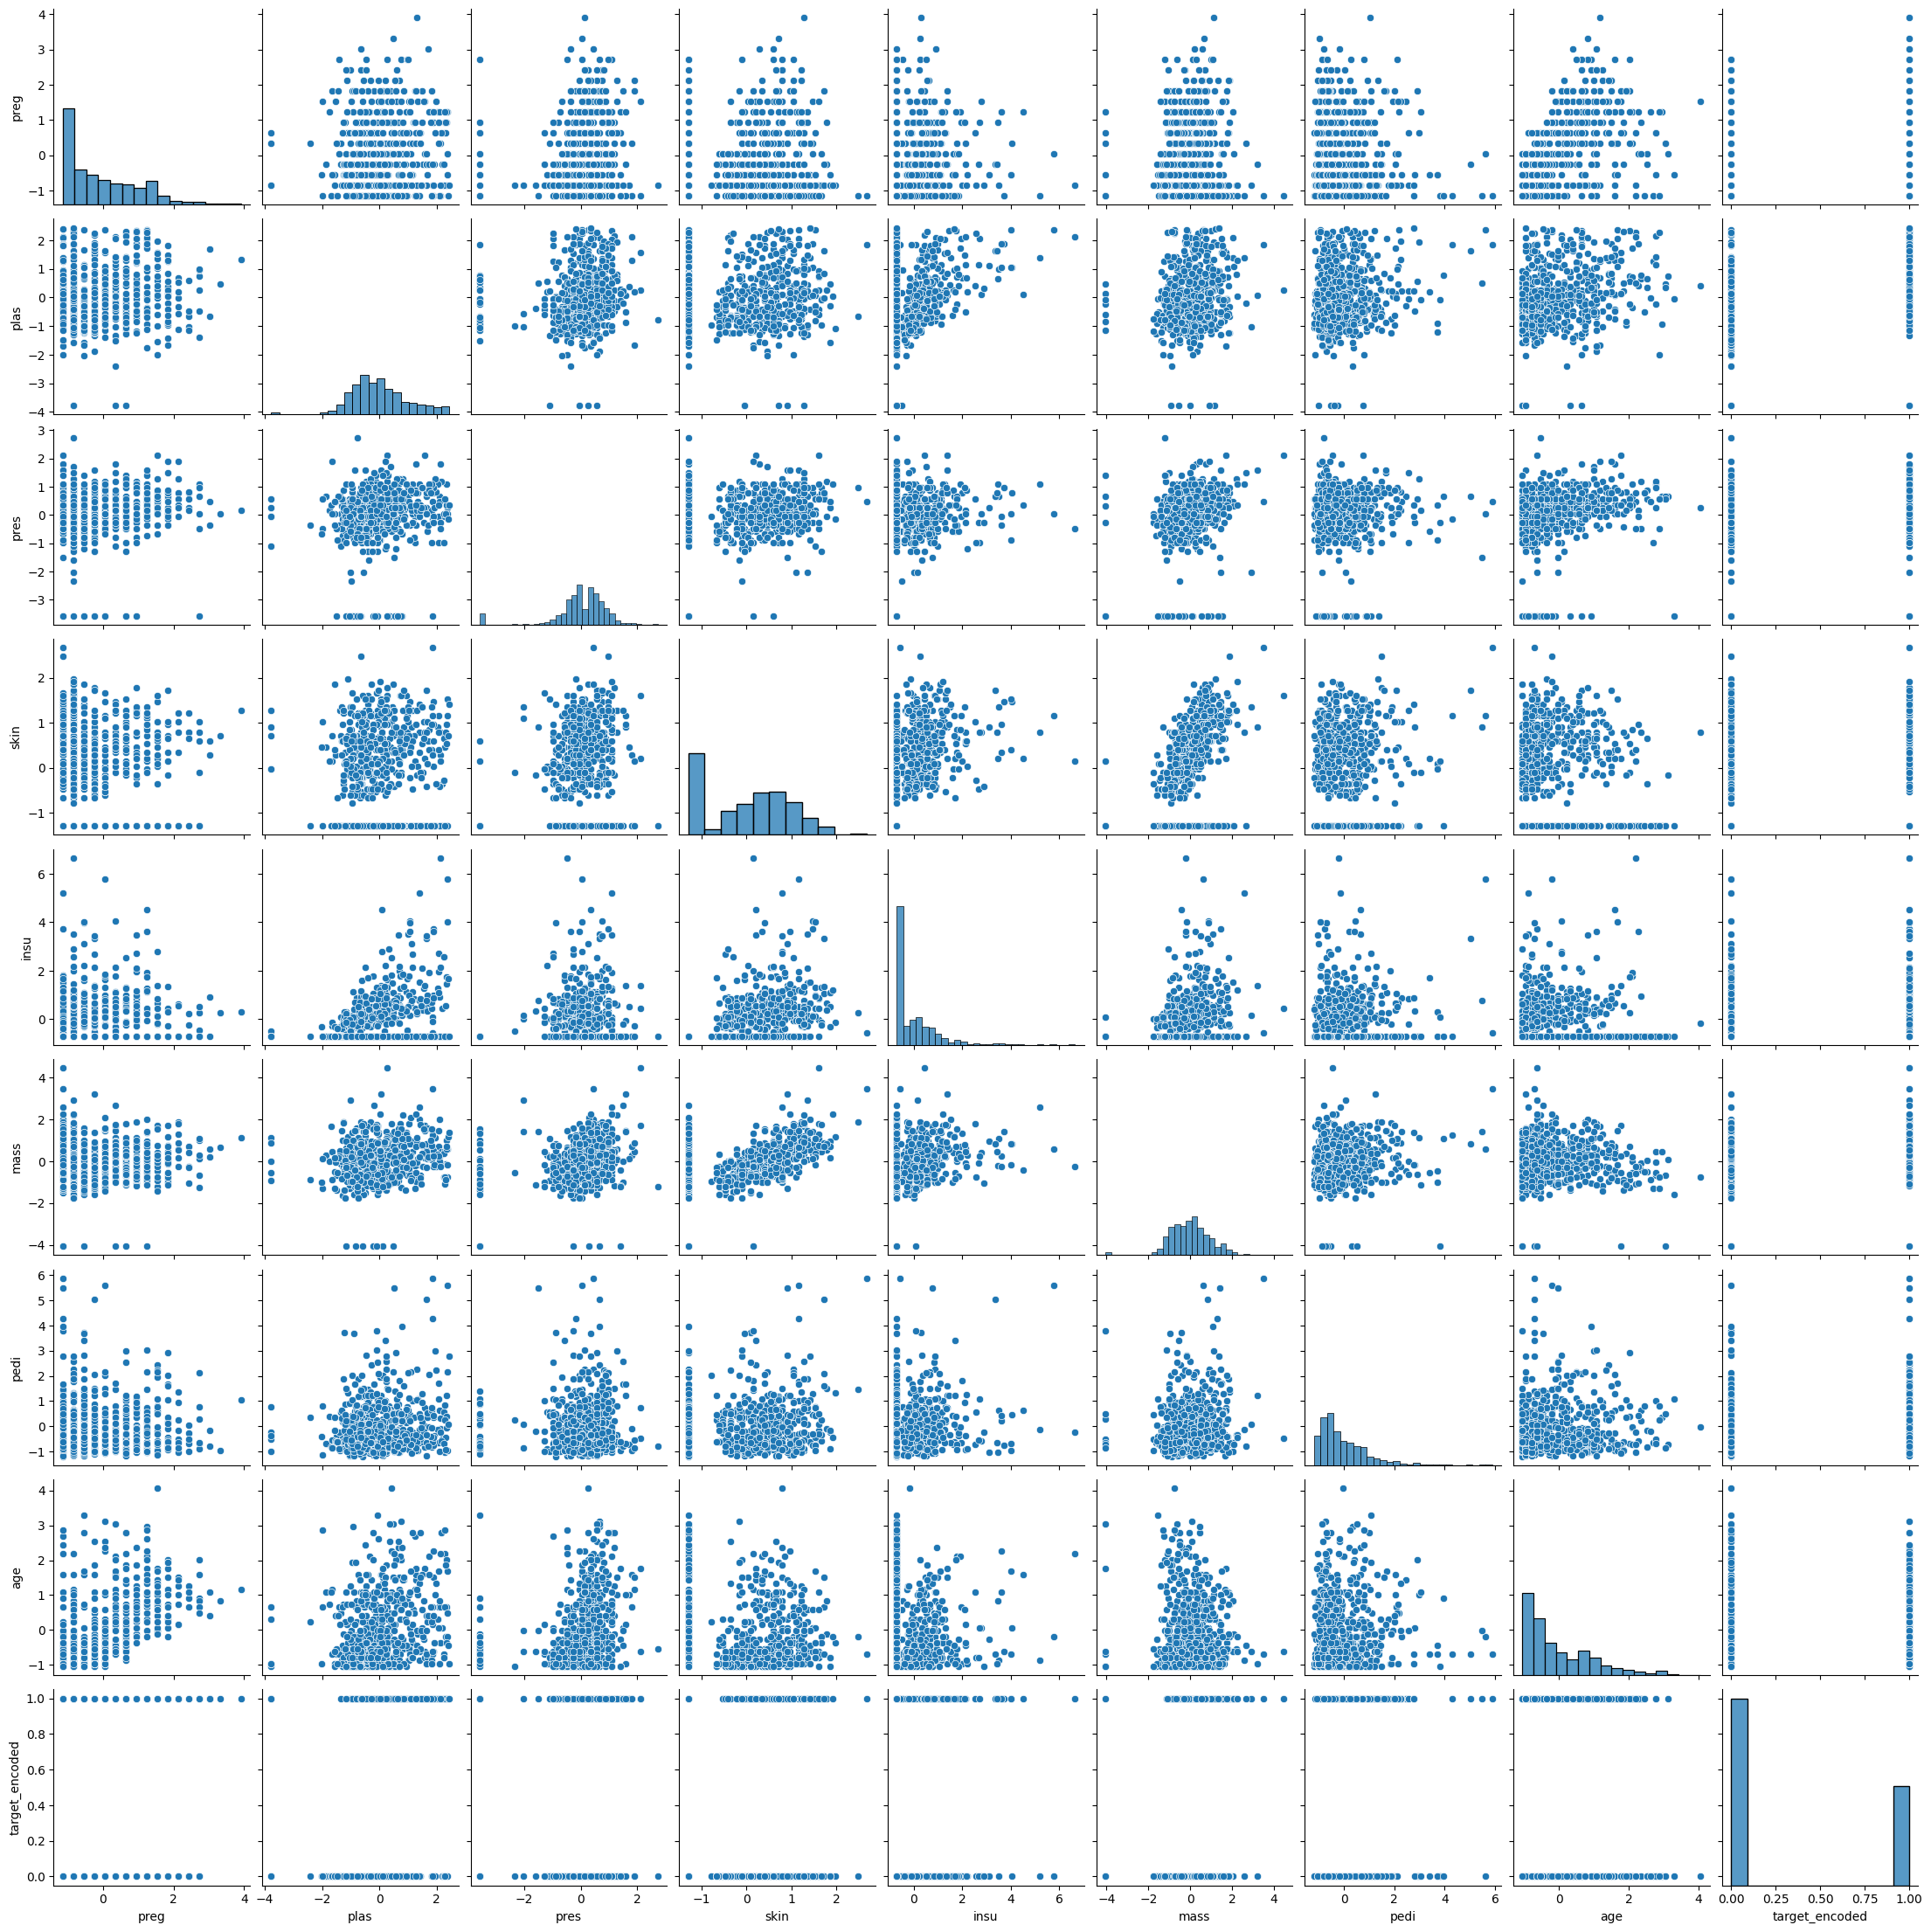

In [106]:
features = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'target_encoded']
sns.pairplot(train_data[features])
plt.show()


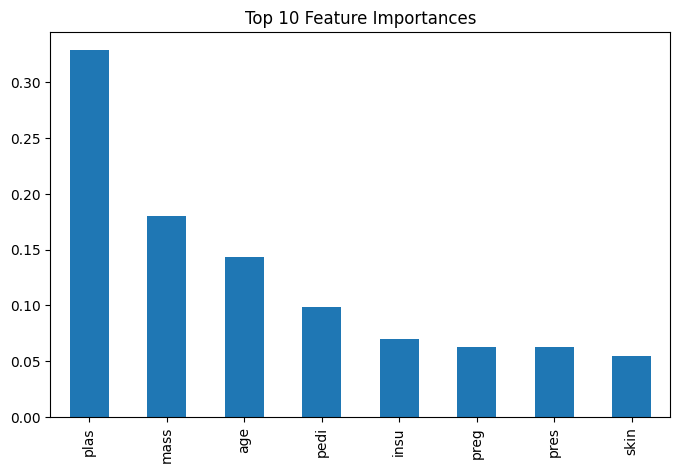

In [107]:
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
importances[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()


2- It can be said by looking at PCC and scatter plot that : Target is related
with plas and mass. It is also weekly related with skin and pres and can be dropped.
plas (Plasma glucose) has the strongest relationship with the label (target_encoded), followed by mass, age, and preg. pres and skin have very weak correlations with the targe.
----------------------------------

4
--------------

A- 
Explore different values of C, solver, max number of iterations and recorded the best combinations below.
------

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Model
lr = LogisticRegression(multi_class='multinomial', random_state=42)

# Grid Search
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_macro', n_jobs=-1)
grid_lr.fit(X_train, y_train_encoded)

# Best model
best_lr = grid_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

# Evaluate
def evaluate_model(model, X_tr, X_val, X_te, y_tr, y_val, y_te):
    results = {}
    for split, X, y in [('Train', X_tr, y_tr), ('Validation', X_val, y_val), ('Test', X_te, y_te)]:
        y_pred = model.predict(X)
        results[split] = {
            'Accuracy': accuracy_score(y, y_pred),
            'Precision': precision_score(y, y_pred, average='macro'),
            'Recall': recall_score(y, y_pred, average='macro'),
            'F1': f1_score(y, y_pred, average='macro')
        }
    return pd.DataFrame(results).T

lr_results = evaluate_model(best_lr, X_train, X_val, X_test, y_train_encoded, le.transform(y_val), le.transform(y_test))
lr_results


Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


,Accuracy,Precision,Recall,F1
Train,0.770358,0.753523,0.720739,0.730945
Validation,0.779221,0.748428,0.743077,0.745578
Test,0.727273,0.715909,0.722340,0.717949


C controls regularization strength, balancing underfitting and overfitting. The solver determines the optimization algorithm used, affecting convergence speed and stability, especially on large or complex datasets. The maximum number of iterations sets how long the solver can run to find a solution; too low may prevent convergence, while higher values increase computation time but ensure proper training. Together, these hyperparameters manage model flexibility, training efficiency, and convergence reliability.

B- 
Explore different values of C, kernel, degree of polynomial kernel, gamma and recorded the best combinations below.
------

In [109]:
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro', n_jobs=-1)
grid_svm.fit(X_train, y_train_encoded)

best_svm = grid_svm.best_estimator_
print("Best parameters for SVM:", grid_svm.best_params_)

svm_results = evaluate_model(best_svm, X_train, X_val, X_test, y_train_encoded, le.transform(y_val), le.transform(y_test))
svm_results


Best parameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


,Accuracy,Precision,Recall,F1
Train,0.828990,0.824398,0.788738,0.801359
Validation,0.740260,0.702381,0.683077,0.690016
Test,0.727273,0.713333,0.704255,0.707542


C controls the tradeoff between margin width and training errors, with higher values reducing bias but increasing overfitting risk. The kernel defines the type of decision boundary, with options like linear, polynomial, or RBF affecting how well complex patterns are captured. Degree applies to polynomial kernels, determining boundary complexity, while gamma sets the influence of individual points low values create smoother boundaries, high values allow tighter fits. Together, these hyperparameters balance flexibility, bias, and variance.

C- 
Explore different values of the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node and recorded the best combinations below.
------

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],           # number of trees
    'max_depth': [None, 10, 20, 30],          # maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4]             # minimum samples at a leaf node
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train_encoded)

best_rf = grid_rf.best_estimator_
print("Best parameters for Random Forest:", grid_rf.best_params_)

rf_results = evaluate_model(
    best_rf,
    X_train, X_val, X_test,
    y_train_encoded,
    le.transform(y_val),
    le.transform(y_test)
)

rf_results


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


,Accuracy,Precision,Recall,F1
Train,0.916938,0.920825,0.894589,0.905575
Validation,0.727273,0.693878,0.704615,0.697926
Test,0.766234,0.755102,0.748227,0.751078


The number of trees (`n_estimators`) increases model stability and accuracy but also raises computation time. The maximum depth (`max_depth`) controls complexity—shallow trees may underfit, while deeper ones can overfit. The minimum samples to split (`min_samples_split`) and minimum samples per leaf (`min_samples_leaf`) prevent overfitting by limiting how finely the tree can divide data. Lower values make the model more flexible but prone to overfitting, whereas higher values simplify the model and improve generalization. Together, these hyperparameters balance accuracy, complexity, and efficiency.


5-
Creating the ensemble.
---

In [111]:
from sklearn.ensemble import VotingClassifier

# Create ensemble from best models
ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm),
        ('rf', best_rf)
    ],
    voting='soft'  # use 'hard' for majority voting
)

# Train on combined training set
ensemble.fit(X_train, y_train_encoded)

# Evaluate ensemble
ensemble_results = evaluate_model(
    ensemble,
    X_train, X_val, X_test,
    y_train_encoded, le.transform(y_val), le.transform(y_test)
)

ensemble_results


,Accuracy,Precision,Recall,F1
Train,0.838762,0.835384,0.800622,0.813235
Validation,0.779221,0.748428,0.743077,0.745578
Test,0.779221,0.768319,0.764894,0.766459


In [112]:
comparison = pd.DataFrame({
    'Logistic Regression': lr_results.loc['Test', 'F1'],
    'SVM': svm_results.loc['Test', 'F1'],
    'Random Forest': rf_results.loc['Test', 'F1'],
    'Ensemble': ensemble_results.loc['Test', 'F1']
}, index=['Test F1'])

comparison.T.sort_values(by='Test F1', ascending=False)


,Test F1
Ensemble,0.766459
Random Forest,0.751078
Logistic Regression,0.717949
SVM,0.707542


In [113]:
import matplotlib.pyplot as plt

# Collect F1 scores on the test set
f1_scores = {
    'Logistic Regression': lr_results.loc['Test', 'F1'],
    'SVM': svm_results.loc['Test', 'F1'],
    'Random Forest': rf_results.loc['Test', 'F1'],
    'Ensemble': ensemble_results.loc['Test', 'F1']
}



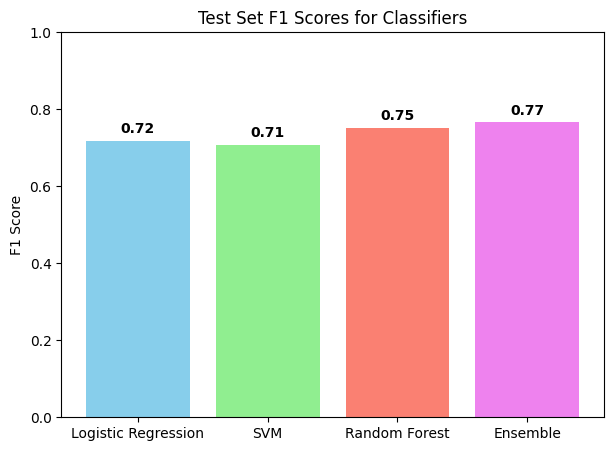

In [114]:
plt.figure(figsize=(7,5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['skyblue', 'lightgreen', 'salmon', 'violet'])
plt.ylim(0,1)
plt.ylabel('F1 Score')
plt.title('Test Set F1 Scores for Classifiers')
for i, v in enumerate(f1_scores.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


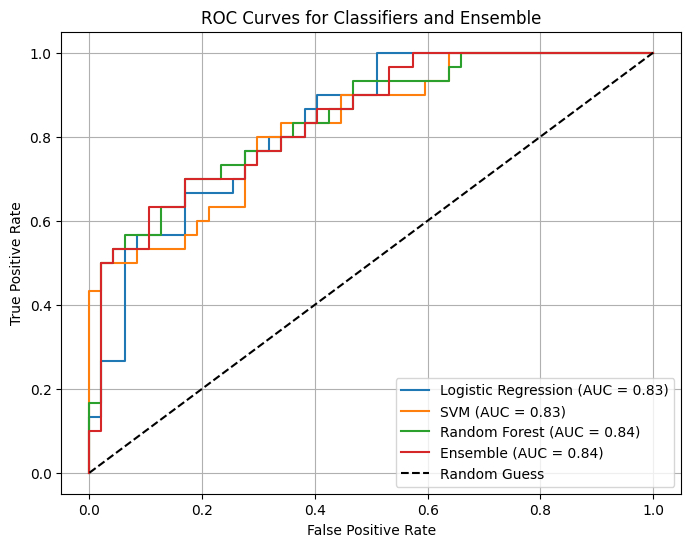

In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# List of models to plot
models = {
    'Logistic Regression': best_lr,
    'SVM': best_svm,
    'Random Forest': best_rf,
    'Ensemble': ensemble
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Some models (SVM without probability) may need probability=True
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]  # probability for positive class
    # else:
    #     # fallback to decision function for models without predict_proba
    #     y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(le.transform(y_test), y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Random guessing line
plt.plot([0,1], [0,1], 'k--', label='Random Guess')

plt.title('ROC Curves for Classifiers and Ensemble')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


After combining the classifiers into an ensemble, the validation results showed improved performance compared with most individual models. The ensemble leveraged the strengths of different classifiers, reducing the weaknesses of any single one, and produced more stable and accurate predictions. Overall, the ensemble demonstrated better generalization on the validation set, indicating that combining diverse models can effectively boost predictive performance.
